In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import warnings
warnings.filterwarnings("ignore")

# 1. STORN model
from STORN import train
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation, gaussian_data_generation
# 3. Metrics
# from metrics.discriminative_metrics import discriminative_score_metrics
# from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

In [2]:
import torch
import numpy as np
import random
seed = 2021
torch.random.manual_seed(seed=seed)
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed_all(seed)

In [3]:
## Data loading
data_name = 'stock'
seq_len = 18

if data_name in ['stock', 'energy']:
    ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
    # Set number of samples and its dimensions
    no, dim = 10000, 5
    ori_data = sine_data_generation(no, seq_len, dim)
elif data_name == 'gaussian':
    no, dim = 10000, 5
    ori_data = gaussian_data_generation(no, seq_len, dim)

print(len(ori_data))
# print(ori_data[-1])

## Newtork parameters
parameters = dict()
parameters['iterations'] = 1000
parameters['device'] = 'cuda:0'
parameters['batch_size'] = 128
parameters['seq_len'] = seq_len
parameters['feature_dim'] = ori_data[0].shape[1]
parameters['hidden_dim'] = 32
parameters['num_layer'] = 3
parameters['learning_rate'] = 1e-3
parameters['gamma'] = 1

# Run TimeGAN
generated_data = train(ori_data, parameters)
print('Finish Synthetic Data Generation')

204
epoch:0, loss:28.173133850097656, loss_negloglike:21.39300537109375, loss_kl:6.780129432678223
epoch:100, loss:5.202249526977539, loss_negloglike:4.153820514678955, loss_kl:1.048429012298584
epoch:200, loss:3.5014424324035645, loss_negloglike:2.2546005249023438, loss_kl:1.2468417882919312
epoch:300, loss:3.375615119934082, loss_negloglike:2.1362648010253906, loss_kl:1.2393501996994019
epoch:400, loss:3.2010340690612793, loss_negloglike:1.9932345151901245, loss_kl:1.2077994346618652
epoch:500, loss:2.8165366649627686, loss_negloglike:1.6323013305664062, loss_kl:1.1842353343963623
epoch:600, loss:2.401144027709961, loss_negloglike:1.337203025817871, loss_kl:1.0639410018920898
epoch:700, loss:2.4544243812561035, loss_negloglike:1.3599028587341309, loss_kl:1.0945215225219727
epoch:800, loss:2.12046217918396, loss_negloglike:1.085827112197876, loss_kl:1.034635066986084
epoch:900, loss:2.3347604274749756, loss_negloglike:1.2207136154174805, loss_kl:1.1140468120574951
Finish Synthetic Dat

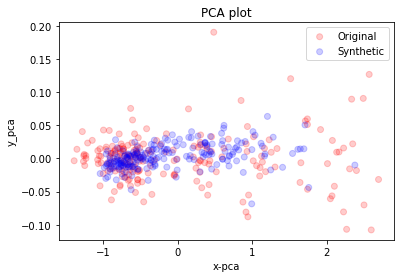

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 408 samples in 0.001s...
[t-SNE] Computed neighbors for 408 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 408 / 408
[t-SNE] Mean sigma: 0.030470
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.226154
[t-SNE] KL divergence after 5000 iterations: 0.224150


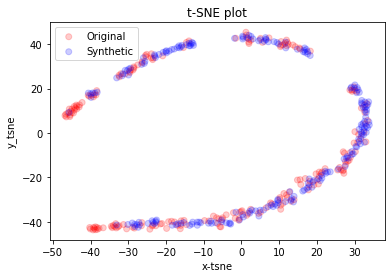

In [4]:
## Performance metrics
# 1. Visualization (PCA and tSNE)
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

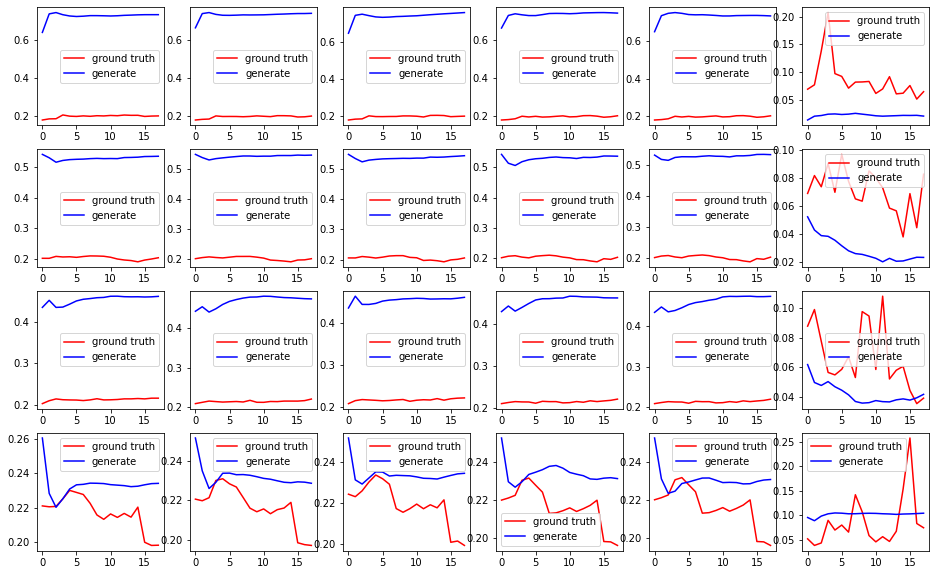

In [5]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(4, generated_data[0].shape[1], figsize=(16, 10))
for i in range(100, 104):
    for j in range(generated_data[0].shape[1]):
        axs[i % 4, j].plot(ori_data[i][:, j], 'red')
        axs[i % 4, j].plot(generated_data[i][:, j], 'blue')
        axs[i % 4, j].legend(['ground truth', 'generate'])

Text(0.5, 1.0, 'whole_trend')

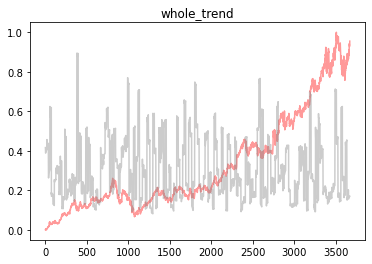

In [6]:
import numpy as np
plt.plot(np.array(ori_data).reshape(-1, np.array(ori_data).shape[-1])[:,0],c="red",alpha=0.4)
plt.plot(np.array(generated_data).reshape(-1, np.array(generated_data).shape[-1])[:,0],c="gray",alpha=0.4)
plt.title("whole_trend")